In [47]:
import numpy as np
import pandas as pd

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils import data
from torchvision import datasets, transforms
from torch import optim

import matplotlib.pyplot as plt
import helper

In [2]:
# define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [33]:
# download and load the trainset data
trainset = datasets.MNIST(r'../input/', download=True, train=True, transform=transform)
trainloader = data.DataLoader(trainset, batch_size=64, shuffle=True)

In [38]:
# build a feed-forward network
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1),
)

# define the loss
criterion = nn.NLLLoss()

# get our data
images, labels = next(iter(trainloader))

# flatten images
images = images.view(images.shape[0], -1)

# forward pass, get logits
logits = model(images)

# calculate loss with logits and labels
loss = criterion(logits, labels)

print(logits.shape)
print(loss)

torch.Size([64, 10])
tensor(2.2773, grad_fn=<NllLossBackward0>)


In [37]:
x = torch.randn(2, 3, requires_grad=True)
x

tensor([[ 1.3697,  0.7713,  0.2360],
        [ 0.2257, -2.1510, -0.5370]], requires_grad=True)

In [22]:
y = x**2
print(y)

tensor([[1.4014e+00, 1.3358e-03, 1.0539e-03],
        [3.3129e-01, 3.2906e+00, 5.5714e-02]], grad_fn=<PowBackward0>)


In [23]:
y.grad_fn

In [24]:
z = y.mean()
z

tensor(0.8469, grad_fn=<MeanBackward0>)

In [25]:
z.backward()
print(x.grad)

tensor([[-0.3946, -0.0122,  0.0108],
        [ 0.1919, -0.6047,  0.0787]])


In [27]:
print(x/3)

tensor([[-0.3946, -0.0122,  0.0108],
        [ 0.1919, -0.6047,  0.0787]], grad_fn=<DivBackward0>)


In [40]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)

In [46]:
model[0].weight.shape

torch.Size([128, 784])

In [50]:
for param in model.parameters():
    print(type(param), param.size())

<class 'torch.nn.parameter.Parameter'> torch.Size([128, 784])
<class 'torch.nn.parameter.Parameter'> torch.Size([128])
<class 'torch.nn.parameter.Parameter'> torch.Size([64, 128])
<class 'torch.nn.parameter.Parameter'> torch.Size([64])
<class 'torch.nn.parameter.Parameter'> torch.Size([10, 64])
<class 'torch.nn.parameter.Parameter'> torch.Size([10])


In [42]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026],
        [ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069],
        ...,
        [ 0.0110,  0.0110,  0.0110,  ...,  0.0110,  0.0110,  0.0110],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [-0.0057, -0.0057, -0.0057,  ..., -0.0057, -0.0057, -0.0057]])


In [51]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [64]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

optimizer.zero_grad()

output = model(images)
loss = criterion(output, labels)
print(loss)
loss.backward()
print('Gradient - ', model[0].weight.grad)
print(loss)

Initial weights -  Parameter containing:
tensor([[ 0.0273,  0.0151, -0.0110,  ..., -0.0226,  0.0262, -0.0018],
        [ 0.0099, -0.0046, -0.0129,  ...,  0.0133,  0.0035, -0.0289],
        [-0.0333, -0.0158,  0.0134,  ...,  0.0018,  0.0242,  0.0280],
        ...,
        [-0.0321, -0.0123, -0.0226,  ..., -0.0223, -0.0316,  0.0277],
        [ 0.0015, -0.0354, -0.0214,  ...,  0.0328,  0.0187, -0.0356],
        [-0.0341, -0.0188, -0.0338,  ...,  0.0116,  0.0108,  0.0253]],
       requires_grad=True)
tensor(2.2892, grad_fn=<NllLossBackward0>)
Gradient -  tensor([[-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [-0.0038, -0.0038, -0.0038,  ..., -0.0038, -0.0038, -0.0038],
        ...,
        [-0.0052, -0.0052, -0.0052,  ..., -0.0052, -0.0052, -0.0052],
        [-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019],
        [-0.0023, -0.0023, -0.0023,  ..., -0.0023, -0.0023, -0.0023]])
tensor(2.

In [65]:
optimizer.step()
print('Updated weights - ', model[0].weight)
print(loss)

Updated weights -  Parameter containing:
tensor([[ 0.0273,  0.0151, -0.0110,  ..., -0.0226,  0.0262, -0.0017],
        [ 0.0099, -0.0046, -0.0129,  ...,  0.0133,  0.0035, -0.0288],
        [-0.0332, -0.0157,  0.0134,  ...,  0.0018,  0.0243,  0.0281],
        ...,
        [-0.0320, -0.0122, -0.0226,  ..., -0.0223, -0.0315,  0.0277],
        [ 0.0015, -0.0354, -0.0214,  ...,  0.0328,  0.0187, -0.0356],
        [-0.0340, -0.0188, -0.0338,  ...,  0.0116,  0.0108,  0.0254]],
       requires_grad=True)
tensor(2.2892, grad_fn=<NllLossBackward0>)


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [74]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # flatten images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        # training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f'Training loss: {running_loss/len(trainloader)}')

Training loss: 1.8816530633328565
Training loss: 0.8403302636990415
Training loss: 0.5199721493700674
Training loss: 0.42738731572432304
Training loss: 0.3849257745468286


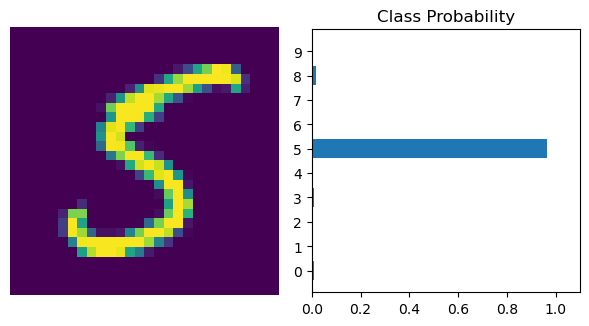

In [88]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

# turn off gradients to speed it up
with torch.no_grad():
    logps = model(img)
    
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)